<a href="https://colab.research.google.com/github/kagdelwarsejal/img2poem/blob/main/Test_vision_%2B_poem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-generativeai

In [3]:
import google.generativeai as genai
import PIL.Image
import requests
from IPython.display import display
from google.colab import userdata

# Set your API key
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

# Load the model
model = genai.GenerativeModel("gemini-2.5-flash-lite")

/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


Saving coffee & beats 🍵 jazzy japan lofi mix.jpeg to coffee & beats 🍵 jazzy japan lofi mix (1).jpeg


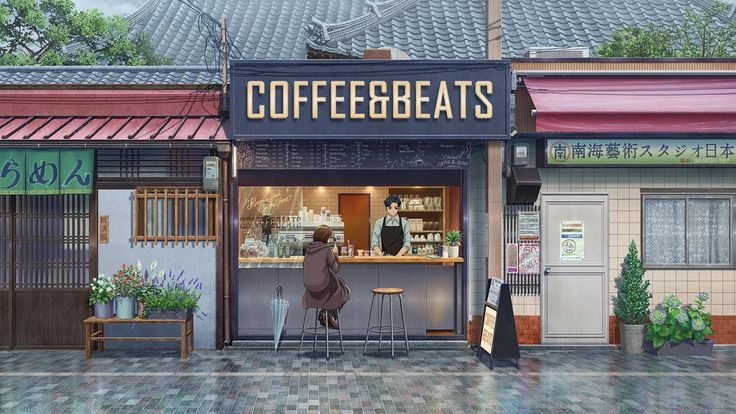

In [4]:
# # Option A: from a URL
# from io import BytesIO
# url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/280px-PNG_transparency_demonstration_1.png"
# response = requests.get(url)
# img = PIL.Image.open(BytesIO(response.content))
# display(img)

# Option B: upload from your computer (uncomment to use)
from google.colab import files
uploaded = files.upload()
img = PIL.Image.open(list(uploaded.keys())[0])
display(img)

In [15]:
# Parameters (you'll later expose these to the user)
language = "English"
style = "free verse"
lines = 8
mood = "melancholic"
temperature = 0.9

prompt = f"""
You are a creative poet. Look at this image carefully.
Write a {style} poem inspired by it in {language}.
The poem should be around {lines} lines long with a {mood} tone.
Be vivid, original, and avoid clichés.
Only output the poem, nothing else.
"""

response = model.generate_content(
    [prompt, img],
    generation_config=genai.types.GenerationConfig(
        temperature=temperature,
        max_output_tokens=300,
    )
)

print("=" * 40)
print("🎵 GENERATED POEM")
print("=" * 40)
print(response.text)

🎵 GENERATED POEM
Coffee and a hollow echo,
a stranger's back a silhouette
against the polished gleam.
Rain whispers on the pavement,
a muffled rhythm,
unheard beneath the counter's hum.
The air, a blend of steam and unmet words,
drifting with the scent of brewing silence.


In [11]:
for m in genai.list_models():
    print(m.name)

models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3.1-pro-preview
models/gemini-3.1-pro-preview-customtools
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-3.1-flash-image-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview-10-2025
models/deep-research-pro-preview-12-2025
models/gemini-embedding-001
models/aqa
models/

In [19]:
model2 = genai.GenerativeModel("gemini-2.5-flash")

In [20]:
# Parameters (you'll later expose these to the user)
language = "English"
style = "free verse"
lines = 8
mood = "melancholic"
temperature = 0.9

prompt = f"""
You are a creative poet. Look at this image carefully.
Write a {style} poem inspired by it in {language}.
The poem should be around {lines} lines long with a {mood} tone.
Be vivid, original, and avoid clichés.
Only output the poem, nothing else.
"""

response = model2.generate_content(
    [prompt, img],
    generation_config=genai.types.GenerationConfig(
        temperature=temperature,
        max_output_tokens=300,
    )
)

print("=" * 40)
print("🎵 GENERATED POEM")
print("=" * 40)
print(response.text)

🎵 GENERATED POEM
A solitary back, a rain-kissed stool,



In [21]:
for lang in ["English", "French", "Spanish", "Hindi"]:
    resp = model.generate_content(
        [f"Write a short 4-line poem about this image in {lang}. Only output the poem.", img],
        generation_config=genai.types.GenerationConfig(temperature=0.9)
    )
    print(f"\n🌐 {lang}:\n{resp.text}")
    print("-" * 30)


🌐 English:
Coffee and beats, a gentle rain,
A quiet moment, easing pain.
Warm brew served with a knowing smile,
A peaceful pause, for a little while.
------------------------------

🌐 French:
Café aux bruits, arôme subtil,
Un client seul, un moment tranquille.
Le barman sert, un sourire discret,
La journée commence, douce et parfaite.
------------------------------

🌐 Spanish:
En "Coffee & Beats", un café tranquilo,
Un barista y cliente comparten un momento.
Aromas de café llenan el aire,
En este rincón de paz, todo está bien.
------------------------------

🌐 Hindi:
कॉफ़ी और बीट्स की दुकान,
बैठा एक ग्राहक, चाय की चुस्कियों का आनंद।
बार के पीछे खड़ा barista,
एक शांत, सुकून भरी शाम।
------------------------------


In [23]:
# ── USER PARAMETERS ──────────────────────────────────────
language        = "Hindi"       # English, French, Spanish, Hindi, Urdu, Vietnamese, Arabic
style           = "free verse"    # free verse, haiku, sonnet, ballad, ode, ghazal
mood            = "melancholic"   # melancholic, joyful, mysterious, romantic, nostalgic, serene
length          = 8               # number of lines
temperature     = 1.0             # 0.5 = safe/predictable, 1.2 = creative/wild
max_tokens      = 400
# ─────────────────────────────────────────────────────────

# Style-specific instructions
style_instructions = {
    "haiku": """Write a traditional Haiku:
        - Exactly 3 lines
        - Syllable structure: 5 / 7 / 5
        - Focus on a single moment, season, or natural element from the image
        - No rhyme, no title""",

    "sonnet": """Write a Shakespearean Sonnet:
        - Exactly 14 lines
        - Rhyme scheme: ABAB CDCD EFEF GG
        - First 12 lines build the theme, final couplet delivers a twist or resolution
        - Iambic pentameter (10 syllables per line, da-DUM rhythm)""",

    "ode": """Write an Ode:
        - 3 to 5 stanzas, each 6-10 lines
        - Elevated, celebratory, and deeply admiring tone
        - Directly address the subject of the image (e.g., 'O golden field...')
        - Rich with metaphor and sensory imagery""",

    "elegy": """Write an Elegy:
        - 3 to 4 stanzas of 4-6 lines each
        - Tone of mourning, loss, longing, or quiet grief
        - Reflect on what is passing, fading, or already gone in the image
        - End with a note of acceptance or peace, not despair""",

    "ballad": """Write a Ballad:
        - 4-line stanzas (quatrains), minimum 3 stanzas
        - Rhyme scheme: ABCB (lines 2 and 4 rhyme)
        - Tell a small story or narrative inspired by the image
        - Simple, musical language — meant to be sung or spoken aloud""",

    "villanelle": """Write a Villanelle:
        - 19 lines total: 5 tercets (3-line stanzas) + 1 quatrain (4-line stanza)
        - Line 1 repeats as line 6, 12, 18
        - Line 3 repeats as line 9, 15, 19
        - Rhyme scheme: ABA throughout
        - The repetition should feel emotionally intensifying, not mechanical""",

    "free verse": f"""Write a Free Verse poem:
        - Approximately {length} lines
        - No rhyme scheme, no fixed meter
        - Use line breaks intentionally for rhythm and emphasis
        - Focus on vivid, concrete imagery over abstract statements""",

    "ghazal": """Write a Ghazal:
        - 5 to 7 couplets (2-line stanzas)
        - Each couplet must be self-contained and able to stand alone
        - The last word or phrase of line 2 in every couplet must be the same (radif)
        - Final couplet should include a self-reference or signature moment
        - Themes of longing, beauty, or loss work best""",

    "prose poem": """Write a Prose Poem:
        - Written as a paragraph (no line breaks), but with the density of poetry
        - 80 to 120 words
        - Use rhythm, repetition, and imagery within flowing prose sentences
        - Should feel like a short story compressed into a single emotional moment""",

    "spoken word": """Write a Spoken Word poem:
        - 12 to 20 lines
        - Written to be performed aloud — punchy, rhythmic, conversational
        - Use repetition, anaphora (repeating a phrase at line starts), and crescendo
        - Build toward an emotional peak in the final 4 lines
        - Raw, direct, and urgent in tone"""
}

prompt = f"""
You are an award-winning poet with deep sensitivity to visual imagery.

Analyze this image across THREE dimensions:
1. OBJECTS: What concrete things, people, or elements are visible?
2. SENTIMENT: What is the emotional atmosphere — warm, cold, tense, peaceful?
3. SCENE CONTEXT: What story, time of day, season, or setting does this suggest?

Using these three layers of perception, write a poem with the following specifications:

STYLE: {style_instructions.get(style, style_instructions["free verse"])}
LANGUAGE: Write entirely in {language}. Do not mix languages.
MOOD/TONE: {mood}
POETIC DEVICES: Use at least 2 of these — metaphor, personification, alliteration, imagery, or symbolism.
QUALITY RULES:
  - Avoid clichés ("like a dream", "heart of gold", etc.)
  - Be specific and surprising — use concrete, unexpected details
  - The poem should feel emotionally resonant, not just descriptive
  - Do NOT title the poem
  - Output ONLY the poem, no explanation or commentary

Begin the poem now:
"""

response = model.generate_content(
    [prompt, img],
    generation_config=genai.types.GenerationConfig(
        temperature=temperature,
        max_output_tokens=max_tokens,
        top_p=0.95,
        top_k=40,
    )
)

print("=" * 50)
print(f"🎵 {style.upper()} POEM  |  {language}  |  mood: {mood}")
print("=" * 50)
print(response.text)

🎵 FREE VERSE POEM  |  Hindi  |  mood: melancholic
अंधेरे ने ली है गली,
रंग फीके, ओस का पानी।
कॉफ़ी और बीट्स का साइन,
एक अकेला बैठा, मानो समय ठहरा।

बारिश की बूंदे, परछाई सी।
फूलों की टोकरी, उदास मुस्काती।
अजनबी की मुस्कान, काँच के पार।
हर कोना एक कहानी, अनकही।


In [24]:
styles = ["free verse", "haiku", "sonnet", "ballad"]

for s in styles:
    style_instructions_map = {
        "haiku":     "Write a traditional haiku: 3 lines with 5-7-5 syllable structure.",
        "sonnet":    "Write a 14-line Shakespearean sonnet with ABAB CDCD EFEF GG rhyme scheme.",
        "ballad":    "Write a ballad with 4-line stanzas, rhyming ABCB pattern, narrative tone.",
        "free verse": "Write a free verse poem of approximately 8 lines. No forced rhyme.",
    }

    p = f"""
    Analyze this image for objects, sentiment, and scene context.
    {style_instructions_map[s]}
    Language: English. Mood: melancholic.
    Be vivid, avoid clichés. Output only the poem.
    """

    r = model.generate_content(
        [p, img],
        generation_config=genai.types.GenerationConfig(temperature=1.0, max_output_tokens=300)
    )
    print(f"\n{'='*45}")
    print(f"  {s.upper()}")
    print(f"{'='*45}")
    print(r.text)


  FREE VERSE
The sign hangs, a promise of warmth,
but the air tastes of damp pavement.
One lone patron, hunched against the chill,
a closed umbrella leaning by her stool.
Steam curls from a mug, a fleeting breath
in the quiet hum of the espresso machine,
a solitary rhythm
against the muted gray of the sky.

  HAIKU
Rain slicked pavement,
Warm steam, a lone soul lingers,
Melancholy hums.

  SONNET
Within this shop where dark roast doth reside,
A lone soul sits, with shoulders softly bent,
The barman pours, with motions flowing wide,
A silent plea, on lonely moments sent.
The rain descends, on stones of muted grey,
Reflecting lamps, like tears that softly stream,
The words unspoken, in the dying day,
A fading echo of a broken dream.
The coffee steams, a comfort thin and weak,
Against the chill that settles in the soul,
No solace found, though quiet solace seek,
The scattered fragments make no spirit whole.
   So pours the brew, and echoes fill the air,
   A lonely heart, consumed by dee

In [25]:
languages = ["English", "French", "Spanish", "Hindi"]

for lang in languages:
    p = f"""
    Look at this image. Analyze its objects, emotional sentiment, and scene.
    Write a short free verse poem (6 lines) directly in {lang}.
    Be poetic and evocative. Output only the poem.
    """
    r = model.generate_content(
        [p, img],
        generation_config=genai.types.GenerationConfig(temperature=1.0, max_output_tokens=200)
    )
    print(f"\n🌐 {lang}:\n{r.text}\n{'-'*30}")


🌐 English:
Raindrops on the pavement,
A single soul seeks warmth.
Coffee aroma steams,
A quiet beat plays low,
Beneath the neon glow,
A moment caught, suspended.
------------------------------

🌐 French:
Entre le doux arôme du café,
Une âme se repose, écoutant les battements.
Les bruits de la ville s'estompent,
Dans ce refuge baigné de lumière.
Un sourire discret, un instant suspendu,
Le monde extérieur oublié.
------------------------------

🌐 Spanish:
Aroma de café
y ritmo lento.
Refugio de lluvia
y corazón discreto.
Una historia se teje,
entre espuma y silencio.
------------------------------

🌐 Hindi:
कॉफी की महक,
एक पल का ठहराव,
गीली ज़मीं पर,
यादों की बून्दें,
एक ख़ामोश कहानी,
अनकही सी आवाज़।
------------------------------


In [26]:
!pip show flask flask-cors google-generativeai Pillow python-dotenv gunicorn

Name: Flask
Version: 3.1.3
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: blinker, click, itsdangerous, jinja2, markupsafe, werkzeug
Required-by: community
---
Name: google-generativeai
Version: 0.8.6
Summary: Google Generative AI High level API client library and tools.
Home-page: https://github.com/google/generative-ai-python
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: google-ai-generativelanguage, google-api-core, google-api-python-client, google-auth, protobuf, pydantic, tqdm, typing-extensions
Required-by: 
---
Name: pillow
Version: 11.3.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: 
Required

Testing endpoint


In [6]:
import requests, base64
from PIL import Image
from io import BytesIO

# Use the 'img' variable from previous cell, which is a PIL.Image object
# Convert PIL Image to bytes and then to base64
buffered = BytesIO()
img.save(buffered, format="JPEG") # Assuming JPEG format; adjust if your image is different
img_b64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

# Hit your live HF Space API
response = requests.post(
    "https://key-life-img2poem.hf.space/generate",
    json={
        "image_b64": img_b64,
        "language": "English",
        "style": "haiku",
        "mood": "serene",
        "length": 8,
        "temperature": 1.0,
        "max_tokens": 400,
        "top_p": 0.95
    }
)

print(response.json())


{'language': 'English', 'model': 'gemini-2.5-flash-lite', 'mood': 'serene', 'poem': 'Warm steam rises,\nA silent promise brewed,\nThe day exhales.', 'style': 'haiku'}


In [7]:
response = requests.post(
    "https://key-life-img2poem.hf.space/generate",
    json={
        "image_b64": img_b64,
        "language": "English",
        "style": "free verse",
        "mood": "melancholic",
        "length": 16,
        "temperature": 1.1,
        "max_tokens": 600,
        "top_p": 0.95
    }
)
print(response.json()["poem"])

The rain beads,
a hushed ballet on cobblestones.
Inside, "COFFEE & BEATS,"
a neon heart beating softly.

A solitary figure,
a cloak the color of a bruised twilight,
hunches over the counter.
Steam, a ghost, escapes
from a ceramic cup.

Behind the polished wood,
a barista,
a still point in the quiet hum
of the espresso machine.
He polishes glasses,
each gesture a faded memory.

Outside,
lavender and lilies,
brave splashes against the grey,
their fragrance
a thin thread
unspooling into the damp air.
